# Kmeans Method


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
cr=pd.read_csv("crime_data.csv")

In [3]:
cr=cr.rename(columns={"Unnamed: 0":"States"})

In [4]:
cr.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
cr.shape

(50, 5)

# Check for Duplicate Values

In [6]:
cr[cr.duplicated()] # No Duplicate Records

,States,Murder,Assault,UrbanPop,Rape


In [7]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# Check for Outliers

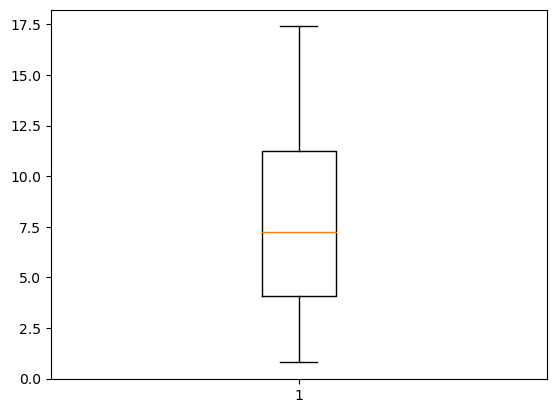

In [8]:
data_box=cr.dropna()
data_box1=data_box.Murder
plt.boxplot(data_box1)
plt.show()

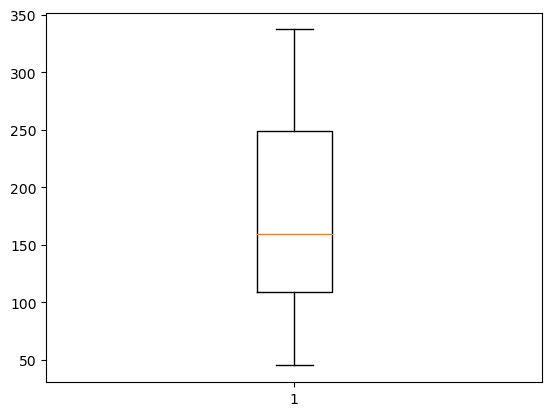

In [9]:
data_box=cr.dropna()
data_box1=data_box.Assault
plt.boxplot(data_box1)
plt.show()

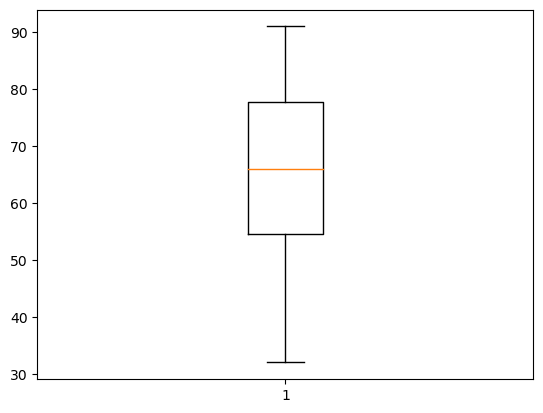

In [10]:
data_box=cr.dropna()
data_box1=data_box.UrbanPop
plt.boxplot(data_box1)
plt.show()

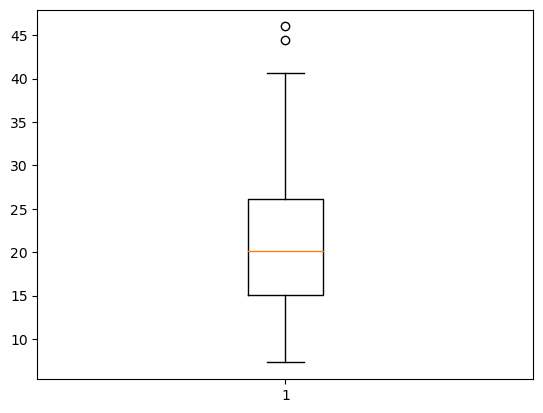

In [11]:
data_box=cr.dropna()
data_box1=data_box.Rape
plt.boxplot(data_box1)
plt.show()

In [12]:
cr.Rape.describe()

count    50.000000
mean     21.232000
std       9.366385
min       7.300000
25%      15.075000
50%      20.100000
75%      26.175000
max      46.000000
Name: Rape, dtype: float64

In [13]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_cr_df= scaler.fit_transform(cr.iloc[:,1:])

In [14]:
scaled_cr_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [15]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(scaled_cr_df)

KMeans(n_clusters=3, random_state=0)

In [16]:
kmeans.inertia_

80.0888613219962

In [17]:
wcss = []
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_cr_df)
    wcss.append(kmeans.inertia_)

C:\Users\thila\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


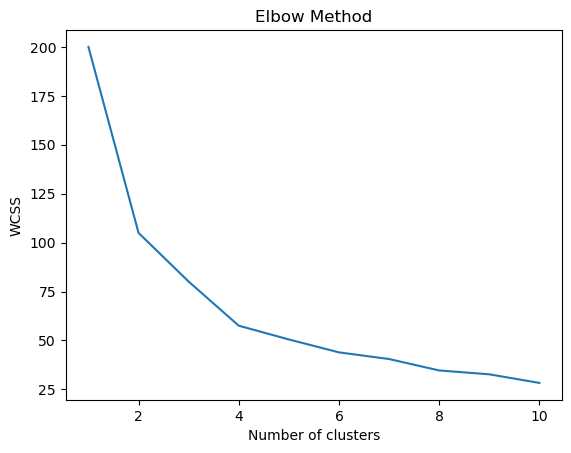

In [18]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
from sklearn.cluster import KMeans
final_model = KMeans(3, random_state=42)
final_model.fit(scaled_cr_df)

KMeans(n_clusters=3, random_state=42)

In [20]:
final_model.labels_

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [21]:
cr['clusterid'] = final_model.labels_

In [22]:
cr

,States,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [23]:
final_model.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.01513667,  1.02412028,  0.19959126,  0.85556386],
       [-0.88515915, -1.0213324 , -0.94990286, -0.92016524]])

In [24]:
cr.groupby('clusterid').agg(['mean'])

C:\Users\thila\AppData\Local\Temp\ipykernel_13252\806014759.py:1: FutureWarning: ['States'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cr.groupby('clusterid').agg(['mean'])


,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusterid,,,,
0,5.656250,138.875,73.875000,18.78125
1,12.165000,255.250,68.400000,29.16500
2,3.971429,86.500,51.928571,12.70000


In [25]:
cr[cr['clusterid']==0]

,States,Murder,Assault,UrbanPop,Rape,clusterid
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [26]:
cr[cr['clusterid']==1]

,States,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1
12,Illinois,10.4,249,83,24.0,1
17,Louisiana,15.4,249,66,22.2,1
19,Maryland,11.3,300,67,27.8,1


In [27]:
cr[cr['clusterid']==2]

,States,Murder,Assault,UrbanPop,Rape,clusterid
3,Arkansas,8.8,190,50,19.5,2
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2


- From the above clustered data it is seen that the optimum no of clusters required for the given dataset is 3

2.Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

# Kmeans method

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [29]:
ewa=pd.read_excel("EastWestAirlines.xlsx",sheet_name=1)

In [30]:
ewa

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_ewa_df = scaler.fit_transform(ewa.iloc[:,1:])

In [32]:
scaled_ewa_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [33]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(scaled_ewa_df)

KMeans(n_clusters=3, random_state=0)

In [34]:
kmeans.inertia_

30899.246824652186

In [35]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_ewa_df)
    wcss.append(kmeans.inertia_)

C:\Users\thila\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


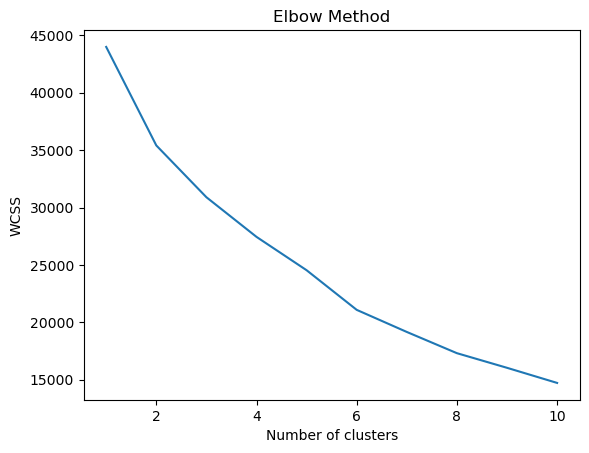

In [36]:
plt.plot(range(1, 11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
from sklearn.cluster import KMeans
final_model = KMeans(4, random_state=42)
final_model.fit(scaled_ewa_df)

KMeans(n_clusters=4, random_state=42)

In [38]:
final_model.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [39]:
ewa['clusterid'] = final_model.labels_

In [40]:
ewa

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [41]:
final_model.cluster_centers_

array([[-2.98478754e-01, -6.42142013e-02, -6.13747535e-01,
         3.28947498e-02, -6.07426678e-02, -5.17995326e-01,
        -4.91207604e-01, -1.86400083e-01, -1.98822948e-01,
        -2.07899699e-01, -3.48824498e-01],
       [ 1.19130578e+00,  1.02056447e+00,  9.95222056e-02,
         1.36680959e-01, -6.27665798e-02,  6.19234895e-01,
         1.55056071e+00,  3.42272158e+00,  3.67662420e+00,
         2.79402662e-01,  9.08902922e-01],
       [ 4.21685967e-01, -9.97266943e-03,  1.18816125e+00,
        -8.23662416e-02, -5.47626400e-02,  9.03299347e-01,
         7.41625184e-01, -9.44153225e-02, -1.04476981e-01,
         3.70515148e-01,  5.62946631e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01]])

In [42]:
ewa.groupby('clusterid').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid,,,,,,,,,,,,
0,2245.555073,43563.850375,94.365969,1.215949,1.019345,1.000395,4646.641532,6.893012,198.932096,0.619029,3688.991709,0.201737
1,1731.196532,193640.947977,933.589595,2.196532,1.034682,1.000000,32098.098266,26.491329,5251.982659,15.317919,4695.491329,0.809249
2,1600.001565,116129.633020,136.613459,3.696401,1.002347,1.001565,38990.929577,18.726135,328.384194,0.978873,4886.052426,0.643192
3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [43]:
ewa[ewa['clusterid']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [44]:
ewa[ewa['clusterid']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,1
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,1
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,1
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,1
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,1
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,1
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,1


In [45]:
ewa[ewa['clusterid']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,2
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,2
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,2
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,2
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,2
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,2
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,2


In [46]:
ewa[ewa['clusterid']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,3
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,3
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,3
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,3
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,3
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,3
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,3
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,3
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,3
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,3


- From the above clustered data it is seen that the optimum no of clusters required for the given dataset is 4